#     <h1> Tropical Cyclone Weather Analysis between Southern and Northern India <h1>
   

<h3><bold>Objective:</bold></h3>
    <p> Predict whether a tropical cyclone will have a significant impact (e.g., high wind speed, heavy rainfall) based on various features, and compare the performance of the model for Southern and Northern India.</p>

<h4> Data Loading and Preprocessing: </h4>
<h5> Import Datset </h5>

In [1]:

import numpy as np
import pandas as pd
#Plotting
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

#math operations lib 
import math
from math import pi

#date manipulation 
import datetime as dt

In [2]:
NI_List_df = pd.read_csv('input/NI_list_v04r00.csv')

C:\Users\vsubramanian\AppData\Local\Temp\ipykernel_21100\2278138323.py:1: DtypeWarning: Columns (161,162) have mixed types. Specify dtype option on import or set low_memory=False.
  NI_List_df = pd.read_csv('input/NI_list_v04r00.csv')


In [3]:
SI_List_df = pd.read_csv('input/SI_list_v04r00.csv')

C:\Users\vsubramanian\AppData\Local\Temp\ipykernel_21100\538368850.py:1: DtypeWarning: Columns (19,20,161,162) have mixed types. Specify dtype option on import or set low_memory=False.
  SI_List_df = pd.read_csv('input/SI_list_v04r00.csv')


In [4]:
NI_List_df.isnull().sum()

SID                0
SEASON             0
NUMBER             0
BASIN            482
SUBBASIN         449
                ... 
USA_SEARAD_SE      0
USA_SEARAD_SW      0
USA_SEARAD_NW      0
STORM_SPEED        0
STORM_DIR          0
Length: 163, dtype: int64

In [5]:
SI_List_df.isnull().sum()

SID              0
SEASON           0
NUMBER           0
BASIN            0
SUBBASIN         0
                ..
USA_SEARAD_SE    0
USA_SEARAD_SW    0
USA_SEARAD_NW    0
STORM_SPEED      0
STORM_DIR        0
Length: 163, dtype: int64

In [6]:
NI_List_df.dropna()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,BOM_GUST_PER,REUNION_GUST,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR
0,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 03:00:00,NR,10.9000,80.3000,...,,,,,,,,,9,266
1,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 06:00:00,NR,10.8709,79.8265,...,,,,,,,,,9,267
2,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 09:00:00,NR,10.8431,79.3524,...,,,,,,,,,9,267
3,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 12:00:00,NR,10.8188,78.8772,...,,,,,,,,,9,267
4,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 15:00:00,NR,10.8000,78.4000,...,,,,,,,,,9,268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60653,2023337N12083,2023,84,NI,BB,MICHAUNG,2023-12-04 12:00:00,NR,13.8000,80.8000,...,,,,,,,,,7,312
60654,2023337N12083,2023,84,NI,BB,MICHAUNG,2023-12-04 15:00:00,NR,14.0502,80.4277,...,,,,,,,,,8,306
60655,2023337N12083,2023,84,NI,BB,MICHAUNG,2023-12-04 18:00:00,NR,14.3000,80.1000,...,,,,,,,,,6,319
60656,2023337N12083,2023,84,NI,BB,MICHAUNG,2023-12-04 21:00:00,NR,14.5124,80.0198,...,,,,,,,,,4,0


In [7]:
print(NI_List_df.isnull().sum())

SID                0
SEASON             0
NUMBER             0
BASIN            482
SUBBASIN         449
                ... 
USA_SEARAD_SE      0
USA_SEARAD_SW      0
USA_SEARAD_NW      0
STORM_SPEED        0
STORM_DIR          0
Length: 163, dtype: int64


In [8]:
NI_List_df.drop(['USA_AGENCY', 'USA_ATCF_ID', 'USA_LAT', 'USA_LON', 'USA_RECORD', 'USA_STATUS', 'USA_WIND', 'USA_WIND', 'USA_PRES'
                , 'USA_SSHS', 'USA_R34_NE', 'USA_R34_SE', 'USA_R34_SW','USA_R34_NW','USA_R50_NE', 'USA_R50_SE', 'USA_R50_SW','USA_R50_NW',
                'USA_R64_NE', 'USA_R64_SE', 'USA_R64_SW','USA_R64_NW','USA_POCI','USA_ROCI', 'USA_RMW', 'USA_EYE'],axis=1, inplace=True)
NI_List_df.drop(['TOKYO_LAT', 'TOKYO_LON', 'TOKYO_GRADE', 'TOKYO_WIND', 'TOKYO_PRES', 'TOKYO_R50_DIR', 'TOKYO_R50_LONG', 'TOKYO_R50_SHORT', 'TOKYO_R30_DIR'
                , 'TOKYO_R30_LONG', 'TOKYO_R30_SHORT', 'TOKYO_LAND'],axis=1, inplace=True)
NI_List_df.drop(['CMA_LAT', 'CMA_LON', 'CMA_CAT', 'CMA_WIND', 'CMA_PRES', 'HKO_LAT', 'HKO_LON', 'HKO_CAT', 'HKO_WIND'
                , 'HKO_PRES'],axis=1, inplace=True)
NI_List_df.drop(['NADI_LAT', 'NADI_LON', 'NADI_CAT', 'NADI_WIND', 'NADI_PRES', 'WELLINGTON_LAT', 'WELLINGTON_LON', 'WELLINGTON_WIND',
                 'WELLINGTON_PRES', 'DS824_LAT', 'DS824_LON', 'DS824_STAGE', 'DS824_WIND', 'DS824_PRES', 'TD9636_LAT',
                 'TD9636_LON', 'TD9636_STAGE', 'TD9636_WIND', 'TD9636_PRES', 'TD9635_LAT', 'TD9635_LON', 'TD9635_WIND',
                'TD9635_PRES', 'TD9635_ROCI'],axis=1, inplace=True)
NI_List_df.drop(['NEUMANN_LAT', 'NEUMANN_LON', 'NEUMANN_CLASS', 'NEUMANN_WIND', 'NEUMANN_PRES', 'MLC_LAT', 'MLC_LON', 'MLC_CLASS',
                 'MLC_WIND', 'MLC_PRES', 'USA_GUST', 'USA_SEAHGT', 'USA_SEARAD_NE', 'USA_SEARAD_SE', 'USA_SEARAD_SW',
                 'USA_SEARAD_NW'],axis=1, inplace=True)
NI_List_df.drop(['BOM_LAT', 'BOM_LON', 'BOM_TYPE', 'BOM_WIND', 'BOM_PRES', 'BOM_TNUM', 'BOM_CI', 'BOM_RMW', 'BOM_R34_NE', 'BOM_R34_SE', 'BOM_R34_SW', 'BOM_R34_NW',
               'BOM_R50_NE', 'BOM_R50_SE', 'BOM_R50_SW', 'BOM_R50_NW', 'BOM_R64_NE','BOM_R64_SE', 'BOM_R64_SW', 'BOM_R64_NW', 'BOM_ROCI', 'BOM_POCI',
       'BOM_EYE', 'BOM_POS_METHOD', 'BOM_PRES_METHOD', 'BOM_GUST', 'BOM_GUST_PER', 'REUNION_GUST', 'REUNION_GUST_PER'],
                axis=1, inplace=True)
NI_List_df.drop(['REUNION_LAT','REUNION_LON', 'REUNION_TYPE', 'REUNION_WIND', 'REUNION_PRES',
       'REUNION_TNUM', 'REUNION_CI', 'REUNION_RMW', 'REUNION_R34_NE', 'REUNION_R34_SE', 'REUNION_R34_SW', 'REUNION_R34_NW', 'REUNION_R50_NE',
       'REUNION_R50_SE', 'REUNION_R50_SW', 'REUNION_R50_NW', 'REUNION_R64_NE', 'REUNION_R64_SE', 'REUNION_R64_SW', 'REUNION_R64_NW'],
                axis=1, inplace=True)

In [9]:
NI_List_df.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,NEWDELHI_LAT,NEWDELHI_LON,NEWDELHI_GRADE,NEWDELHI_WIND,NEWDELHI_PRES,NEWDELHI_CI,NEWDELHI_DP,NEWDELHI_POCI,STORM_SPEED,STORM_DIR
0,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 03:00:00,NR,10.9000,80.3000,...,,,,,,,,,9,266
1,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 06:00:00,NR,10.8709,79.8265,...,,,,,,,,,9,267
2,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 09:00:00,NR,10.8431,79.3524,...,,,,,,,,,9,267
3,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 12:00:00,NR,10.8188,78.8772,...,,,,,,,,,9,267
4,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 15:00:00,NR,10.8000,78.4000,...,,,,,,,,,9,268


In [10]:
SI_List_df.info

<bound method DataFrame.info of                   SID  SEASON  NUMBER BASIN SUBBASIN       NAME  \
0       1848011S09079    1848       1    SI       MM  NOT_NAMED   
1       1848011S09079    1848       1    SI       MM  NOT_NAMED   
2       1848011S09079    1848       1    SI       MM  NOT_NAMED   
3       1848011S09079    1848       1    SI       MM  NOT_NAMED   
4       1848011S09079    1848       1    SI       MM  NOT_NAMED   
...               ...     ...     ...   ...      ...        ...   
168771  2023134S05082    2023      16    SI       MM     FABIEN   
168772  2023134S05082    2023      16    SI       MM     FABIEN   
168773  2023134S05082    2023      16    SI       MM     FABIEN   
168774  2023134S05082    2023      16    SI       MM     FABIEN   
168775  2023134S05082    2023      16    SI       MM     FABIEN   

                   ISO_TIME NATURE       LAT      LON  ... BOM_GUST_PER  \
0       1848-01-11 06:00:00     NR  -9.00000  79.0000  ...                
1       1848-

In [11]:
SI_List_df.drop(['USA_AGENCY', 'USA_ATCF_ID', 'USA_LAT', 'USA_LON', 'USA_RECORD', 'USA_STATUS', 'USA_WIND', 'USA_WIND', 'USA_PRES'
               , 'USA_SSHS', 'USA_R34_NE', 'USA_R34_SE', 'USA_R34_SW','USA_R34_NW','USA_R50_NE', 'USA_R50_SE', 'USA_R50_SW','USA_R50_NW',
               'USA_R64_NE', 'USA_R64_SE', 'USA_R64_SW','USA_R64_NW','USA_POCI','USA_ROCI', 'USA_RMW', 'USA_EYE'],axis=1, inplace=True)
SI_List_df.drop(['TOKYO_LAT', 'TOKYO_LON', 'TOKYO_GRADE', 'TOKYO_WIND', 'TOKYO_PRES', 'TOKYO_R50_DIR', 'TOKYO_R50_LONG', 'TOKYO_R50_SHORT', 'TOKYO_R30_DIR'
               , 'TOKYO_R30_LONG', 'TOKYO_R30_SHORT', 'TOKYO_LAND'],axis=1, inplace=True)
SI_List_df.drop(['CMA_LAT', 'CMA_LON', 'CMA_CAT', 'CMA_WIND', 'CMA_PRES', 'HKO_LAT', 'HKO_LON', 'HKO_CAT', 'HKO_WIND'
              , 'HKO_PRES'],axis=1, inplace=True)
SI_List_df.drop(['NADI_LAT', 'NADI_LON', 'NADI_CAT', 'NADI_WIND', 'NADI_PRES', 'WELLINGTON_LAT', 'WELLINGTON_LON', 'WELLINGTON_WIND',
                'WELLINGTON_PRES', 'DS824_LAT', 'DS824_LON', 'DS824_STAGE', 'DS824_WIND', 'DS824_PRES', 'TD9636_LAT',
                 'TD9636_LON', 'TD9636_STAGE', 'TD9636_WIND', 'TD9636_PRES', 'TD9635_LAT', 'TD9635_LON', 'TD9635_WIND',
                'TD9635_PRES', 'TD9635_ROCI'],axis=1, inplace=True)
SI_List_df.drop(['NEUMANN_LAT', 'NEUMANN_LON', 'NEUMANN_CLASS', 'NEUMANN_WIND', 'NEUMANN_PRES', 'MLC_LAT', 'MLC_LON', 'MLC_CLASS',
                 'MLC_WIND', 'MLC_PRES', 'USA_GUST', 'USA_SEAHGT', 'USA_SEARAD_NE', 'USA_SEARAD_SE', 'USA_SEARAD_SW',
                 'USA_SEARAD_NW'],axis=1, inplace=True)
SI_List_df.drop(['BOM_LAT', 'BOM_LON', 'BOM_TYPE', 'BOM_WIND', 'BOM_PRES', 'BOM_TNUM', 'BOM_CI', 'BOM_RMW', 'BOM_R34_NE', 'BOM_R34_SE', 'BOM_R34_SW', 'BOM_R34_NW',
               'BOM_R50_NE', 'BOM_R50_SE', 'BOM_R50_SW', 'BOM_R50_NW', 'BOM_R64_NE','BOM_R64_SE', 'BOM_R64_SW', 'BOM_R64_NW', 'BOM_ROCI', 'BOM_POCI',
       'BOM_EYE', 'BOM_POS_METHOD', 'BOM_PRES_METHOD', 'BOM_GUST', 'BOM_GUST_PER', 'REUNION_GUST', 'REUNION_GUST_PER'],axis=1, inplace=True)
SI_List_df.drop(['REUNION_LAT','REUNION_LON', 'REUNION_TYPE', 'REUNION_WIND', 'REUNION_PRES',
       'REUNION_TNUM', 'REUNION_CI', 'REUNION_RMW', 'REUNION_R34_NE', 'REUNION_R34_SE', 'REUNION_R34_SW', 'REUNION_R34_NW', 'REUNION_R50_NE',
       'REUNION_R50_SE', 'REUNION_R50_SW', 'REUNION_R50_NW', 'REUNION_R64_NE', 'REUNION_R64_SE', 'REUNION_R64_SW', 'REUNION_R64_NW'],axis=1, inplace=True)

In [12]:
SI_List_df.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,NEWDELHI_LAT,NEWDELHI_LON,NEWDELHI_GRADE,NEWDELHI_WIND,NEWDELHI_PRES,NEWDELHI_CI,NEWDELHI_DP,NEWDELHI_POCI,STORM_SPEED,STORM_DIR
0,1848011S09079,1848,1,SI,MM,NOT_NAMED,1848-01-11 06:00:00,NR,-9.00000,79.0000,...,,,,,,,,,26,252
1,1848011S09079,1848,1,SI,MM,NOT_NAMED,1848-01-11 09:00:00,NR,-9.40782,77.7341,...,,,,,,,,,26,252
2,1848011S09079,1848,1,SI,MM,NOT_NAMED,1848-01-11 12:00:00,NR,-9.83076,76.4735,...,,,,,,,,,26,250
3,1848011S09079,1848,1,SI,MM,NOT_NAMED,1848-01-11 15:00:00,NR,-10.28820,75.2264,...,,,,,,,,,26,248
4,1848011S09079,1848,1,SI,MM,NOT_NAMED,1848-01-11 18:00:00,NR,-10.80000,74.0000,...,,,,,,,,,26,245


In [13]:
NI_List_df['STORM_SPEED'] = pd.to_numeric(NI_List_df['STORM_SPEED'],errors='coerce')
NI_List_df['STORM_DIR'] =  pd.to_numeric(NI_List_df['STORM_DIR'], errors='coerce')
NI_List_df['LANDFALL'] =  pd.to_numeric(NI_List_df['LANDFALL'], errors='coerce')
NI_List_df['NEWDELHI_WIND'] = pd.to_numeric(NI_List_df['NEWDELHI_WIND'],errors='coerce')
NI_List_df['NEWDELHI_PRES'] =  pd.to_numeric(NI_List_df['NEWDELHI_PRES'], errors='coerce')
NI_List_df['NEWDELHI_CI'] =  pd.to_numeric(NI_List_df['NEWDELHI_CI'], errors='coerce')
NI_List_df['NEWDELHI_DP'] =  pd.to_numeric(NI_List_df['NEWDELHI_PRES'], errors='coerce')
NI_List_df['NEWDELHI_POCI'] =  pd.to_numeric(NI_List_df['NEWDELHI_CI'], errors='coerce')



In [14]:
SI_List_df['STORM_SPEED'] = pd.to_numeric(SI_List_df['STORM_SPEED'],errors='coerce')
SI_List_df['STORM_DIR'] =  pd.to_numeric(SI_List_df['STORM_DIR'], errors='coerce')
SI_List_df['LANDFALL'] =  pd.to_numeric(SI_List_df['LANDFALL'], errors='coerce')
SI_List_df['NEWDELHI_WIND'] = pd.to_numeric(SI_List_df['NEWDELHI_WIND'],errors='coerce')
SI_List_df['NEWDELHI_PRES'] =  pd.to_numeric(SI_List_df['NEWDELHI_PRES'], errors='coerce')
SI_List_df['NEWDELHI_CI'] =  pd.to_numeric(SI_List_df['NEWDELHI_CI'], errors='coerce')
SI_List_df['NEWDELHI_DP'] =  pd.to_numeric(SI_List_df['NEWDELHI_PRES'], errors='coerce')
SI_List_df['NEWDELHI_POCI'] =  pd.to_numeric(SI_List_df['NEWDELHI_CI'], errors='coerce')


In [15]:
#'Formatted Date' transformation:

NI_List_df['Date'] = pd.to_datetime(NI_List_df['ISO_TIME'])
NI_List_df['year'] = NI_List_df['Date'].dt.year
NI_List_df['month'] = NI_List_df['Date'].dt.month
NI_List_df['day'] = NI_List_df['Date'].dt.day
NI_List_df['Time'] = NI_List_df['Date'].dt.time
NI_List_df['hour'] = NI_List_df['Date'].dt.hour
NI_List_df.head()


,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,NEWDELHI_DP,NEWDELHI_POCI,STORM_SPEED,STORM_DIR,Date,year,month,day,Time,hour
0,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 03:00:00,NR,10.9000,80.3000,...,NaN,NaN,9.0,266.0,1842-10-25 03:00:00,1842,10,25,03:00:00,3
1,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 06:00:00,NR,10.8709,79.8265,...,NaN,NaN,9.0,267.0,1842-10-25 06:00:00,1842,10,25,06:00:00,6
2,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 09:00:00,NR,10.8431,79.3524,...,NaN,NaN,9.0,267.0,1842-10-25 09:00:00,1842,10,25,09:00:00,9
3,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 12:00:00,NR,10.8188,78.8772,...,NaN,NaN,9.0,267.0,1842-10-25 12:00:00,1842,10,25,12:00:00,12
4,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 15:00:00,NR,10.8000,78.4000,...,NaN,NaN,9.0,268.0,1842-10-25 15:00:00,1842,10,25,15:00:00,15


In [16]:
#'Formatted Date' transformation:

SI_List_df['Date'] = pd.to_datetime(SI_List_df['ISO_TIME'])
SI_List_df['year'] = SI_List_df['Date'].dt.year
SI_List_df['month'] = SI_List_df['Date'].dt.month
SI_List_df['day'] = SI_List_df['Date'].dt.day
SI_List_df['Time'] = SI_List_df['Date'].dt.time
SI_List_df['hour'] = SI_List_df['Date'].dt.hour
SI_List_df.head()


,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,NEWDELHI_DP,NEWDELHI_POCI,STORM_SPEED,STORM_DIR,Date,year,month,day,Time,hour
0,1848011S09079,1848,1,SI,MM,NOT_NAMED,1848-01-11 06:00:00,NR,-9.00000,79.0000,...,NaN,NaN,26.0,252.0,1848-01-11 06:00:00,1848,1,11,06:00:00,6
1,1848011S09079,1848,1,SI,MM,NOT_NAMED,1848-01-11 09:00:00,NR,-9.40782,77.7341,...,NaN,NaN,26.0,252.0,1848-01-11 09:00:00,1848,1,11,09:00:00,9
2,1848011S09079,1848,1,SI,MM,NOT_NAMED,1848-01-11 12:00:00,NR,-9.83076,76.4735,...,NaN,NaN,26.0,250.0,1848-01-11 12:00:00,1848,1,11,12:00:00,12
3,1848011S09079,1848,1,SI,MM,NOT_NAMED,1848-01-11 15:00:00,NR,-10.28820,75.2264,...,NaN,NaN,26.0,248.0,1848-01-11 15:00:00,1848,1,11,15:00:00,15
4,1848011S09079,1848,1,SI,MM,NOT_NAMED,1848-01-11 18:00:00,NR,-10.80000,74.0000,...,NaN,NaN,26.0,245.0,1848-01-11 18:00:00,1848,1,11,18:00:00,18


In [17]:
SEASONS  = [2023,2022, 2021,2020,2019,2018,2017,2016, 2015]
BASINS = ['NI', 'SI']
SUBBASINS = ['BB', 'AS','MM']

In [18]:
Weather_Analysis_NI_df1 = NI_List_df[NI_List_df.SEASON.isin(SEASONS)]
Weather_Analysis_NI_df1 = Weather_Analysis_NI_df1[Weather_Analysis_NI_df1.BASIN.isin(BASINS)]
Weather_Analysis_NI_df1 = Weather_Analysis_NI_df1[Weather_Analysis_NI_df1.SUBBASIN.isin(SUBBASINS)]


In [19]:
Weather_Analysis_SI_df1 = SI_List_df[SI_List_df.SEASON.isin(SEASONS)]
Weather_Analysis_SI_df1 = Weather_Analysis_SI_df1[Weather_Analysis_SI_df1.BASIN.isin(BASINS)]
Weather_Analysis_SI_df1 = Weather_Analysis_SI_df1[Weather_Analysis_SI_df1.SUBBASIN.isin(SUBBASINS)]

In [20]:
Weather_Analysis_NI_df1.count()

SID               2916
SEASON            2916
NUMBER            2916
BASIN             2916
SUBBASIN          2916
NAME              2916
ISO_TIME          2916
NATURE            2916
LAT               2916
LON               2916
WMO_WIND          2916
WMO_PRES          2916
WMO_AGENCY        2916
TRACK_TYPE        2916
DIST2LAND         2916
LANDFALL          2824
IFLAG             2916
NEWDELHI_LAT      2916
NEWDELHI_LON      2916
NEWDELHI_GRADE    2916
NEWDELHI_WIND     2125
NEWDELHI_PRES     2125
NEWDELHI_CI       1753
NEWDELHI_DP       2125
NEWDELHI_POCI     1753
STORM_SPEED       2916
STORM_DIR         2916
Date              2916
year              2916
month             2916
day               2916
Time              2916
hour              2916
dtype: int64

In [21]:
Weather_Analysis_SI_df1.count()

SID               6384
SEASON            6384
NUMBER            6384
BASIN             6384
SUBBASIN          6384
NAME              6384
ISO_TIME          6384
NATURE            6384
LAT               6384
LON               6384
WMO_WIND          6384
WMO_PRES          6384
WMO_AGENCY        6384
TRACK_TYPE        6384
DIST2LAND         6384
LANDFALL          6293
IFLAG             6384
NEWDELHI_LAT      6384
NEWDELHI_LON      6384
NEWDELHI_GRADE    6384
NEWDELHI_WIND        0
NEWDELHI_PRES        0
NEWDELHI_CI          0
NEWDELHI_DP          0
NEWDELHI_POCI        0
STORM_SPEED       6384
STORM_DIR         6384
Date              6384
year              6384
month             6384
day               6384
Time              6384
hour              6384
dtype: int64

In [22]:
Weather_Analysis_SI_df1.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,NEWDELHI_DP,NEWDELHI_POCI,STORM_SPEED,STORM_DIR,Date,year,month,day,Time,hour
157948,2014319S06066,2015,85,SI,MM,ADJALI,15-11-2014 00:00,NR,-6.00000,66.0000,...,NaN,NaN,5.0,176.0,2014-11-15 00:00:00,2014,11,15,00:00:00,0
157949,2014319S06066,2015,85,SI,MM,ADJALI,15-11-2014 03:00,NR,-6.24000,66.0025,...,NaN,NaN,6.0,170.0,2014-11-15 03:00:00,2014,11,15,03:00:00,3
157950,2014319S06066,2015,85,SI,MM,ADJALI,15-11-2014 06:00,TS,-6.55000,66.1000,...,NaN,NaN,6.0,170.0,2014-11-15 06:00:00,2014,11,15,06:00:00,6
157951,2014319S06066,2015,85,SI,MM,ADJALI,15-11-2014 09:00,TS,-6.79250,66.0967,...,NaN,NaN,5.0,183.0,2014-11-15 09:00:00,2014,11,15,09:00:00,9
157952,2014319S06066,2015,85,SI,MM,ADJALI,15-11-2014 12:00,TS,-7.01429,66.0857,...,NaN,NaN,4.0,186.0,2014-11-15 12:00:00,2014,11,15,12:00:00,12


In [23]:
Weather_Analysis_SI_df1.isnull().sum()

SID                  0
SEASON               0
NUMBER               0
BASIN                0
SUBBASIN             0
NAME                 0
ISO_TIME             0
NATURE               0
LAT                  0
LON                  0
WMO_WIND             0
WMO_PRES             0
WMO_AGENCY           0
TRACK_TYPE           0
DIST2LAND            0
LANDFALL            91
IFLAG                0
NEWDELHI_LAT         0
NEWDELHI_LON         0
NEWDELHI_GRADE       0
NEWDELHI_WIND     6384
NEWDELHI_PRES     6384
NEWDELHI_CI       6384
NEWDELHI_DP       6384
NEWDELHI_POCI     6384
STORM_SPEED          0
STORM_DIR            0
Date                 0
year                 0
month                0
day                  0
Time                 0
hour                 0
dtype: int64

In [24]:
# Merge based on all rows using concat
weather_merged_df = pd.concat([Weather_Analysis_NI_df1, Weather_Analysis_SI_df1], ignore_index=True)

In [25]:
weather_merged_df.dropna()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,NEWDELHI_DP,NEWDELHI_POCI,STORM_SPEED,STORM_DIR,Date,year,month,day,Time,hour
7,2015157N13069,2015,31,NI,AS,ASHOBAA,2015-06-07 03:00:00,TS,15.2600,68.5400,...,1004.0,1.5,3.0,324.0,2015-06-07 03:00:00,2015,6,7,03:00:00,3
8,2015157N13069,2015,31,NI,AS,ASHOBAA,2015-06-07 06:00:00,TS,15.4667,68.4000,...,1004.0,1.5,6.0,338.0,2015-06-07 06:00:00,2015,6,7,06:00:00,6
10,2015157N13069,2015,31,NI,AS,ASHOBAA,2015-06-07 12:00:00,TS,16.2000,68.2500,...,1003.0,1.5,7.0,0.0,2015-06-07 12:00:00,2015,6,7,12:00:00,12
12,2015157N13069,2015,31,NI,AS,ASHOBAA,2015-06-07 18:00:00,TS,16.8500,68.2500,...,1003.0,1.5,8.0,343.0,2015-06-07 18:00:00,2015,6,7,18:00:00,18
14,2015157N13069,2015,31,NI,AS,ASHOBAA,2015-06-08 00:00:00,TS,17.7000,67.5500,...,996.0,2.0,11.0,310.0,2015-06-08 00:00:00,2015,6,8,00:00:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2587,2021335N08096,2021,105,NI,BB,JAWAD,2021-12-05 03:00:00,TS,18.2888,85.8499,...,1003.0,2.0,11.0,21.0,2021-12-05 03:00:00,2021,12,5,03:00:00,3
2588,2021335N08096,2021,105,NI,BB,JAWAD,2021-12-05 06:00:00,TS,18.7000,86.0500,...,1003.0,2.0,9.0,28.0,2021-12-05 06:00:00,2021,12,5,06:00:00,6
2589,2021335N08096,2021,105,NI,BB,JAWAD,2021-12-05 09:00:00,TS,19.0412,86.2641,...,1004.0,1.5,10.0,37.0,2021-12-05 09:00:00,2021,12,5,09:00:00,9
2590,2021335N08096,2021,105,NI,BB,JAWAD,2021-12-05 12:00:00,NR,19.4714,86.6714,...,1004.0,1.5,12.0,34.0,2021-12-05 12:00:00,2021,12,5,12:00:00,12


In [26]:
import re

In [27]:
# NI - North Indian
# SI - South Indian
# BB - Bay of Bengal
# AS - Arabian Sea
# DS - Disturbance
# TS - Tropical
# ET - Extratropical
# SS - Subtropical
# NR - Not reported
# MX - Mixture (contradicting nature reports from different agencies)

for column in weather_merged_df.columns:
    missing_cnt = weather_merged_df[column][weather_merged_df[column] == -999].count()
    print('Missing Values in column {col} = '.format(col = column) , missing_cnt )
    if missing_cnt!= 0:
#         print('in ' , column)
        mean = round(weather_merged_df[column][weather_merged_df[column] != -999 ].mean())
#         print("mean",mean)
        index = weather_merged_df.loc[weather_merged_df[column] == -999 , column].index
#         print("index" , index )
        weather_merged_df.loc[weather_merged_df[column] == -999 , column] = mean
#         print(df.loc[index , column])


Missing Values in column SID =  0
Missing Values in column SEASON =  0
Missing Values in column NUMBER =  0
Missing Values in column BASIN =  0
Missing Values in column SUBBASIN =  0
Missing Values in column NAME =  0
Missing Values in column ISO_TIME =  0
Missing Values in column NATURE =  0
Missing Values in column LAT =  0
Missing Values in column LON =  0
Missing Values in column WMO_WIND =  0
Missing Values in column WMO_PRES =  0
Missing Values in column WMO_AGENCY =  0
Missing Values in column TRACK_TYPE =  0
Missing Values in column DIST2LAND =  0
Missing Values in column LANDFALL =  0
Missing Values in column IFLAG =  0
Missing Values in column NEWDELHI_LAT =  0
Missing Values in column NEWDELHI_LON =  0
Missing Values in column NEWDELHI_GRADE =  0
Missing Values in column NEWDELHI_WIND =  0
Missing Values in column NEWDELHI_PRES =  0
Missing Values in column NEWDELHI_CI =  0
Missing Values in column NEWDELHI_DP =  0
Missing Values in column NEWDELHI_POCI =  0
Missing Values i

In [28]:
#Categorical variables:
categorical = weather_merged_df.select_dtypes(include = ["object"]).keys()
print(categorical)



Index(['SID', 'BASIN', 'SUBBASIN', 'NAME', 'ISO_TIME', 'NATURE', 'WMO_WIND',
       'WMO_PRES', 'WMO_AGENCY', 'TRACK_TYPE', 'IFLAG', 'NEWDELHI_LAT',
       'NEWDELHI_LON', 'NEWDELHI_GRADE', 'Time'],
      dtype='object')


In [29]:
quantitative = weather_merged_df.select_dtypes(include = ["int64","float64"]).keys()
print(quantitative)

Index(['SEASON', 'NUMBER', 'LAT', 'LON', 'DIST2LAND', 'LANDFALL',
       'NEWDELHI_WIND', 'NEWDELHI_PRES', 'NEWDELHI_CI', 'NEWDELHI_DP',
       'NEWDELHI_POCI', 'STORM_SPEED', 'STORM_DIR', 'year', 'month', 'day',
       'hour'],
      dtype='object')


In [30]:
weather_merged_df['Time'] = weather_merged_df['Time'].astype('object')
def hhmm(time):
    time = str(time)
    digits = re.findall(r'\d', time)
    t = ''
    if len(digits) == 1:
        t ='0{i}00'.format(i =time)
    elif len(digits) == 2:
        t = '{i}00'.format(i =time)
    elif len(digits) == 3:
        t = '0{i}'.format(i =time)
    else:
        t = time
    return t
# Apply the function.
weather_merged_df['Time'] = weather_merged_df['Time'].apply(hhmm)

#Convert the column into Datetime.
weather_merged_df['Time'] = pd.to_datetime(weather_merged_df['Time']).dt.time

In [31]:
weather_merged_df.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,NEWDELHI_DP,NEWDELHI_POCI,STORM_SPEED,STORM_DIR,Date,year,month,day,Time,hour
0,2015157N13069,2015,31,NI,AS,ASHOBAA,2015-06-06 06:00:00,TS,13.10,68.5000,...,NaN,NaN,7.0,8.0,2015-06-06 06:00:00,2015,6,6,06:00:00,6
1,2015157N13069,2015,31,NI,AS,ASHOBAA,2015-06-06 09:00:00,TS,13.45,68.5599,...,NaN,NaN,7.0,8.0,2015-06-06 09:00:00,2015,6,6,09:00:00,9
2,2015157N13069,2015,31,NI,AS,ASHOBAA,2015-06-06 12:00:00,TS,13.80,68.6000,...,NaN,NaN,7.0,3.0,2015-06-06 12:00:00,2015,6,6,12:00:00,12
3,2015157N13069,2015,31,NI,AS,ASHOBAA,2015-06-06 15:00:00,TS,14.15,68.6075,...,NaN,NaN,7.0,0.0,2015-06-06 15:00:00,2015,6,6,15:00:00,15
4,2015157N13069,2015,31,NI,AS,ASHOBAA,2015-06-06 18:00:00,TS,14.50,68.6000,...,NaN,NaN,7.0,358.0,2015-06-06 18:00:00,2015,6,6,18:00:00,18


In [32]:
# Convert the status column to categorical.
weather_merged_df['NATURE'] = weather_merged_df['NATURE'].astype('category')


In [33]:
weather_merged_df[categorical]

,SID,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,WMO_WIND,WMO_PRES,WMO_AGENCY,TRACK_TYPE,IFLAG,NEWDELHI_LAT,NEWDELHI_LON,NEWDELHI_GRADE,Time
0,2015157N13069,NI,AS,ASHOBAA,2015-06-06 06:00:00,TS,,,,main,O_____________,,,,06:00:00
1,2015157N13069,NI,AS,ASHOBAA,2015-06-06 09:00:00,TS,,,,main,P_____________,,,,09:00:00
2,2015157N13069,NI,AS,ASHOBAA,2015-06-06 12:00:00,TS,,,,main,O_____________,,,,12:00:00
3,2015157N13069,NI,AS,ASHOBAA,2015-06-06 15:00:00,TS,,,,main,P_____________,,,,15:00:00
4,2015157N13069,NI,AS,ASHOBAA,2015-06-06 18:00:00,TS,,,,main,O_____________,,,,18:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9295,2023134S05082,SI,MM,FABIEN,22-05-2023 06:00,NR,,,,PROVISIONAL,O_____________,,,,06:00:00
9296,2023134S05082,SI,MM,FABIEN,22-05-2023 09:00,NR,,,,PROVISIONAL,P_____________,,,,09:00:00
9297,2023134S05082,SI,MM,FABIEN,22-05-2023 12:00,NR,,,,PROVISIONAL,O_____________,,,,12:00:00
9298,2023134S05082,SI,MM,FABIEN,22-05-2023 15:00,NR,,,,PROVISIONAL,P_____________,,,,15:00:00


In [34]:
#weather_merged_df.info
merged_data = weather_merged_df.drop(columns = ['SID' , 'TRACK_TYPE', 'IFLAG'])

In [35]:
categorical_t = merged_data.select_dtypes(include = ["object"]).keys()
merged_data[categorical_t]

,BASIN,SUBBASIN,NAME,ISO_TIME,WMO_WIND,WMO_PRES,WMO_AGENCY,NEWDELHI_LAT,NEWDELHI_LON,NEWDELHI_GRADE,Time
0,NI,AS,ASHOBAA,2015-06-06 06:00:00,,,,,,,06:00:00
1,NI,AS,ASHOBAA,2015-06-06 09:00:00,,,,,,,09:00:00
2,NI,AS,ASHOBAA,2015-06-06 12:00:00,,,,,,,12:00:00
3,NI,AS,ASHOBAA,2015-06-06 15:00:00,,,,,,,15:00:00
4,NI,AS,ASHOBAA,2015-06-06 18:00:00,,,,,,,18:00:00
...,...,...,...,...,...,...,...,...,...,...,...
9295,SI,MM,FABIEN,22-05-2023 06:00,,,,,,,06:00:00
9296,SI,MM,FABIEN,22-05-2023 09:00,,,,,,,09:00:00
9297,SI,MM,FABIEN,22-05-2023 12:00,,,,,,,12:00:00
9298,SI,MM,FABIEN,22-05-2023 15:00,,,,,,,15:00:00


In [36]:
merged_data[quantitative]

,SEASON,NUMBER,LAT,LON,DIST2LAND,LANDFALL,NEWDELHI_WIND,NEWDELHI_PRES,NEWDELHI_CI,NEWDELHI_DP,NEWDELHI_POCI,STORM_SPEED,STORM_DIR,year,month,day,hour
0,2015,31,13.1000,68.5000,624,601.0,NaN,NaN,NaN,NaN,NaN,7.0,8.0,2015,6,6,6
1,2015,31,13.4500,68.5599,597,584.0,NaN,NaN,NaN,NaN,NaN,7.0,8.0,2015,6,6,9
2,2015,31,13.8000,68.6000,584,571.0,NaN,NaN,NaN,NaN,NaN,7.0,3.0,2015,6,6,12
3,2015,31,14.1500,68.6075,566,551.0,NaN,NaN,NaN,NaN,NaN,7.0,0.0,2015,6,6,15
4,2015,31,14.5000,68.6000,551,538.0,NaN,NaN,NaN,NaN,NaN,7.0,358.0,2015,6,6,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9295,2023,16,-11.8000,69.0000,1523,1502.0,NaN,NaN,NaN,NaN,NaN,6.0,172.0,2023,5,22,6
9296,2023,16,-12.1850,69.0700,1503,1483.0,NaN,NaN,NaN,NaN,NaN,8.0,166.0,2023,5,22,9
9297,2023,16,-12.6000,69.2000,1485,1479.0,NaN,NaN,NaN,NaN,NaN,8.0,157.0,2023,5,22,12
9298,2023,16,-12.8925,69.3850,1484,1478.0,NaN,NaN,NaN,NaN,NaN,6.0,142.0,2023,5,22,15


In [37]:
# Select columns you need
merged_data_df = merged_data[['NAME', 'BASIN']]
# Group boroughs and crimes and count numbers
df_grouped = merged_data_df.groupby(['NAME', 'BASIN']).size().reset_index()
# Create a pivot table
table = pd.pivot_table(df_grouped, index=['BASIN'], columns=['NAME'])
# Delete columns with Nan values and convert to integers
table = table.fillna(value=0).astype(int)
table

0                                                                \
NAME  ABELA ADJALI ALCIDE ALICIA AMBALI AMPHAN ANA ANNABELLE ASANI ASHLEY   
BASIN                                                                       
NI        0      0      0      0      0     51   0         0    35      0   
SI       65     77     91     69     49      0  17        71     0     13   

       ...                                                                   
NAME   ... SAVANNAH SITRANG TAUKTAE TEJ TITLI URIAH VARDAH VAYU VERNON YAAS  
BASIN  ...                                                                   
NI     ...        0      11      49  31    40     0    103   77      0   39  
SI     ...       38       0       0   0     0    86      0    0      1    0  

[2 rows x 136 columns]

In [38]:
row_num = [1] # No. of the row
font_color = '#525252'
#colors = ['#f7ecb0', '#ffb3e6', '#99ff99', '#66b3ff', '#c7b3fb','#ff6666', '#f9c3b7']
values = table.iloc[row_num].values.tolist()[0] # crime numbers
print(values)
labels = [x[1] for x in table.columns] # crime names
print(labels)
title = table.iloc[row_num].index.values.tolist()[0] # borough

[65, 77, 91, 69, 49, 0, 17, 71, 0, 13, 0, 85, 8, 29, 86, 101, 75, 115, 0, 75, 101, 63, 35, 0, 0, 1, 139, 107, 125, 121, 0, 75, 101, 95, 27, 93, 107, 85, 47, 0, 37, 64, 61, 0, 47, 59, 27, 75, 25, 75, 129, 69, 65, 55, 79, 33, 73, 69, 51, 0, 129, 99, 86, 42, 101, 173, 55, 53, 75, 0, 0, 89, 86, 61, 93, 0, 119, 77, 67, 87, 0, 0, 71, 0, 101, 18, 73, 42, 39, 41, 0, 37, 125, 113, 57, 36, 8, 43, 78, 53, 0, 0, 0, 0, 69, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 300, 0, 0, 0, 0, 13, 0, 38, 0, 0, 0, 0, 86, 0, 0, 1, 0]
['ABELA', 'ADJALI', 'ALCIDE', 'ALICIA', 'AMBALI', 'AMPHAN', 'ANA', 'ANNABELLE', 'ASANI', 'ASHLEY', 'ASHOBAA', 'AVA', 'BAKUNG', 'BALITA', 'BANSI', 'BATSIRAI', 'BELNA', 'BERGUITTA', 'BIPARJOY', 'BOHALE', 'BONGOYO', 'BOUCHRA', 'BRANSBY', 'BULBUL:MATMO', 'BUREVI', 'CALEB', 'CALVINIA', 'CARLOS', 'CEBILE', 'CHALANE', 'CHAPALA', 'CHEDZA', 'CHENESO', 'CILIDA', 'CLIFF', 'CORENTIN', 'DANILO', 'DARIAN', 'DAYA', 'DAYE', 'DESMOND', 'DIAMONDRA', 'DIANE', 'DIANMU', 'DINEO', 'DINGANI', 'DUMAKO', 'DU

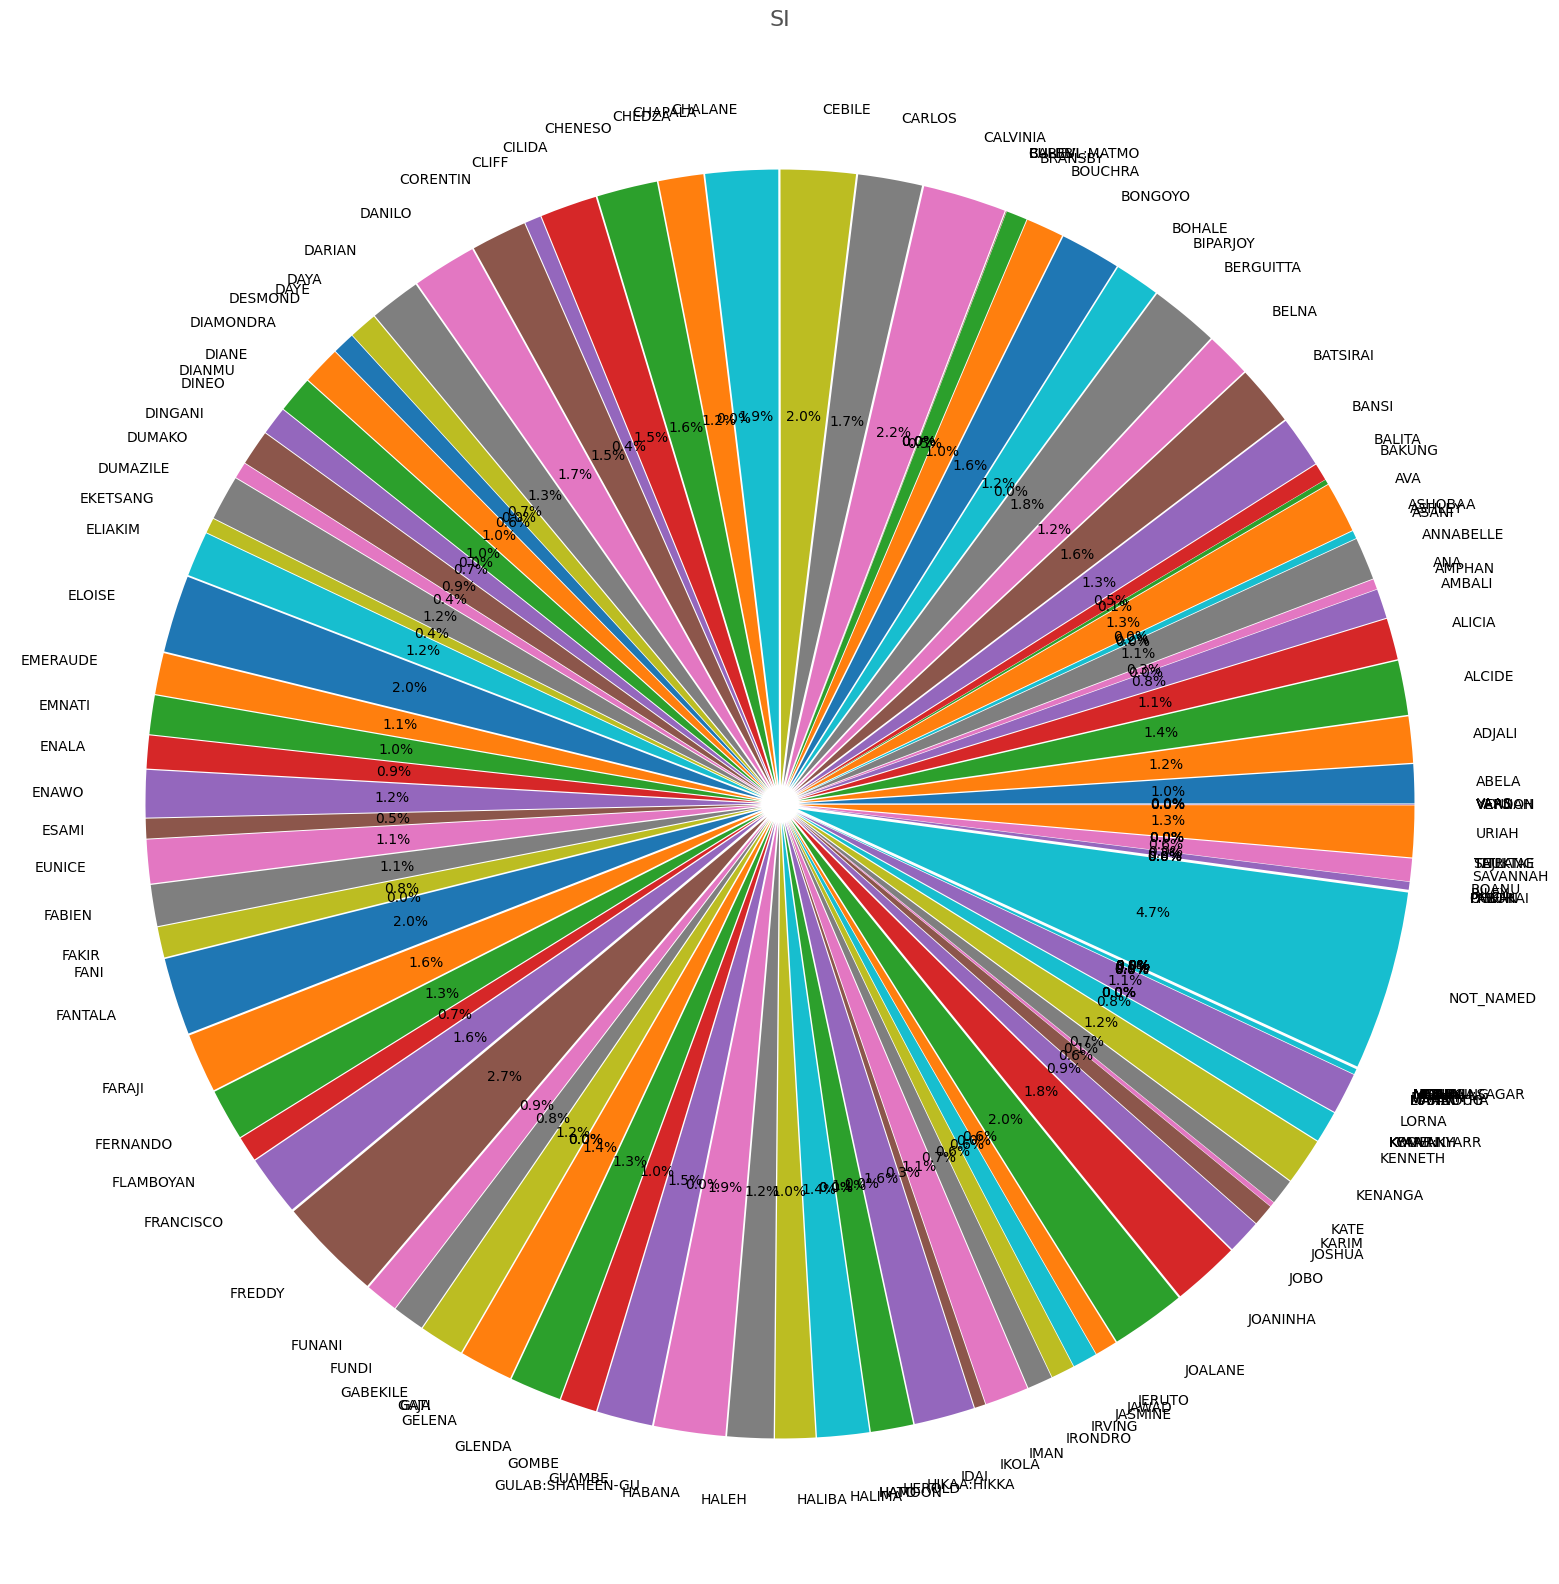

In [39]:
# fig , ax = plt.subplots(figsize=(10, 7), facecolor='#e8f4f0')
# fig.set_size_inches(30,20)
# ax.pie(labels = lst , x = val , autopct='%.1f%%' , explode = [0.03 for x in range(10)])
# plt.title(' Top  Tropical Cyclone by Frequency.' , fontsize = 30)
# plt.show()


# Create subplots and a pie chart
fig, ax = plt.subplots(figsize=(30, 20))
ax.pie(x= values, labels=labels,  autopct='%.1f%%', explode = [0.03 for x in values])
# Set title, its position, and font size
title = plt.title(title, fontsize=16, color=font_color)
title.set_position([.5, 1.02])
plt.rcParams['font.size'] = 16.0

C:\Users\vsubramanian\AppData\Local\Temp\ipykernel_21100\2056871528.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_bar['month'] = merged_data_bar['Date'].apply(lambda x: x.month)
C:\Users\vsubramanian\AppData\Local\Temp\ipykernel_21100\2056871528.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_bar['year'] = merged_data_bar['Date'].apply(lambda x: x.year)


Text(0.5, 1.0, 'Frequency of Cyclones by Month.')

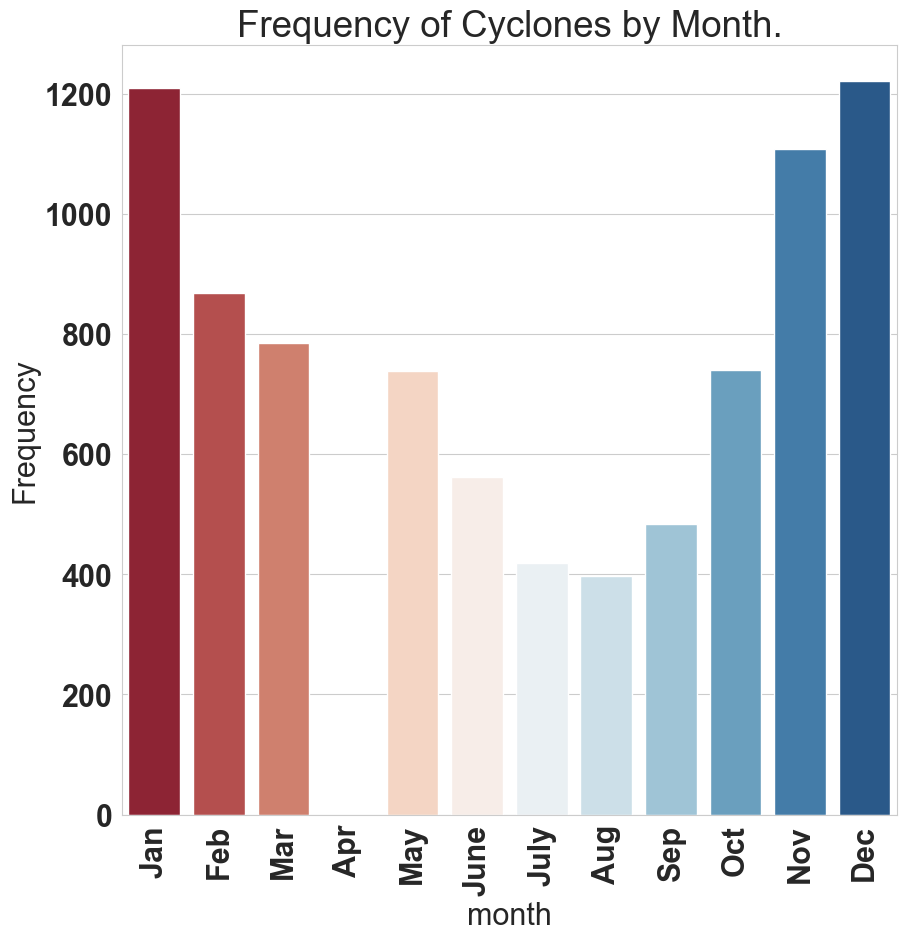

In [40]:
merged_data_bar = merged_data[['NAME', 'BASIN','Date']]
merged_data_bar['month'] = merged_data_bar['Date'].apply(lambda x: x.month)
merged_data_bar['year'] = merged_data_bar['Date'].apply(lambda x: x.year)
mnt = ['Jan' , 'Feb' , 'Mar' , 'Apr' , 'May' , 'June' , 'July' , 'Aug' , 'Sep','Oct' , 'Nov' , 'Dec']
temp = merged_data_bar.groupby('month').count()
temp.loc[4] = 0
temp = temp.sort_values(by = 'month' , ascending = False)
font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)
plt.figure(figsize = (10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x = temp.index , y = 'Date' , data=temp , palette = 'RdBu' )
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11] , mnt , rotation = 90)
plt.ylabel('Frequency')
plt.title('Frequency of Cyclones by Month.')


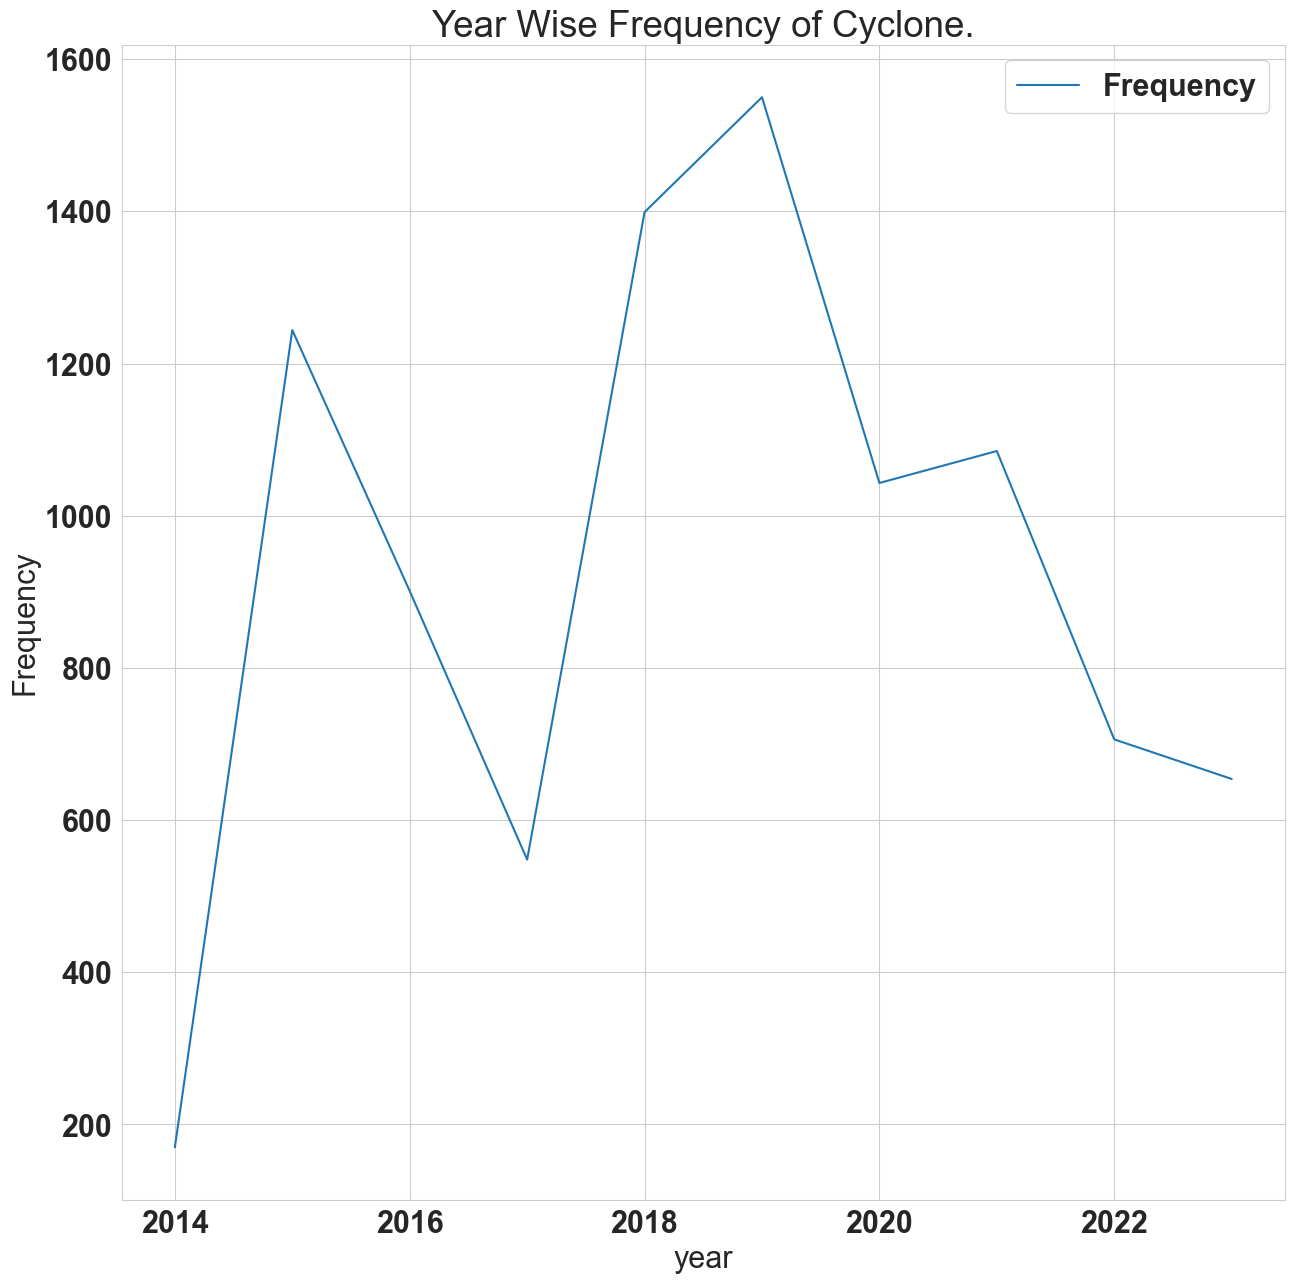

In [41]:
temp = merged_data.groupby('year').count().sort_values(by = 'NATURE' , ascending = False)
plt.figure(figsize= (15,15))
sns.lineplot(x = temp.index , y = 'NATURE' , data = temp , label = 'Frequency')
plt.ylabel('Frequency')
plt.title('Year Wise Frequency of Cyclone.')
plt.show()

C:\Users\vsubramanian\AppData\Local\Temp\ipykernel_21100\84235059.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp['Date'].values , norm_hist = True , axlabel = 'Probability Distribution of Frequency of Cyclones.')


<Axes: xlabel='Probability Distribution of Frequency of Cyclones.', ylabel='Density'>

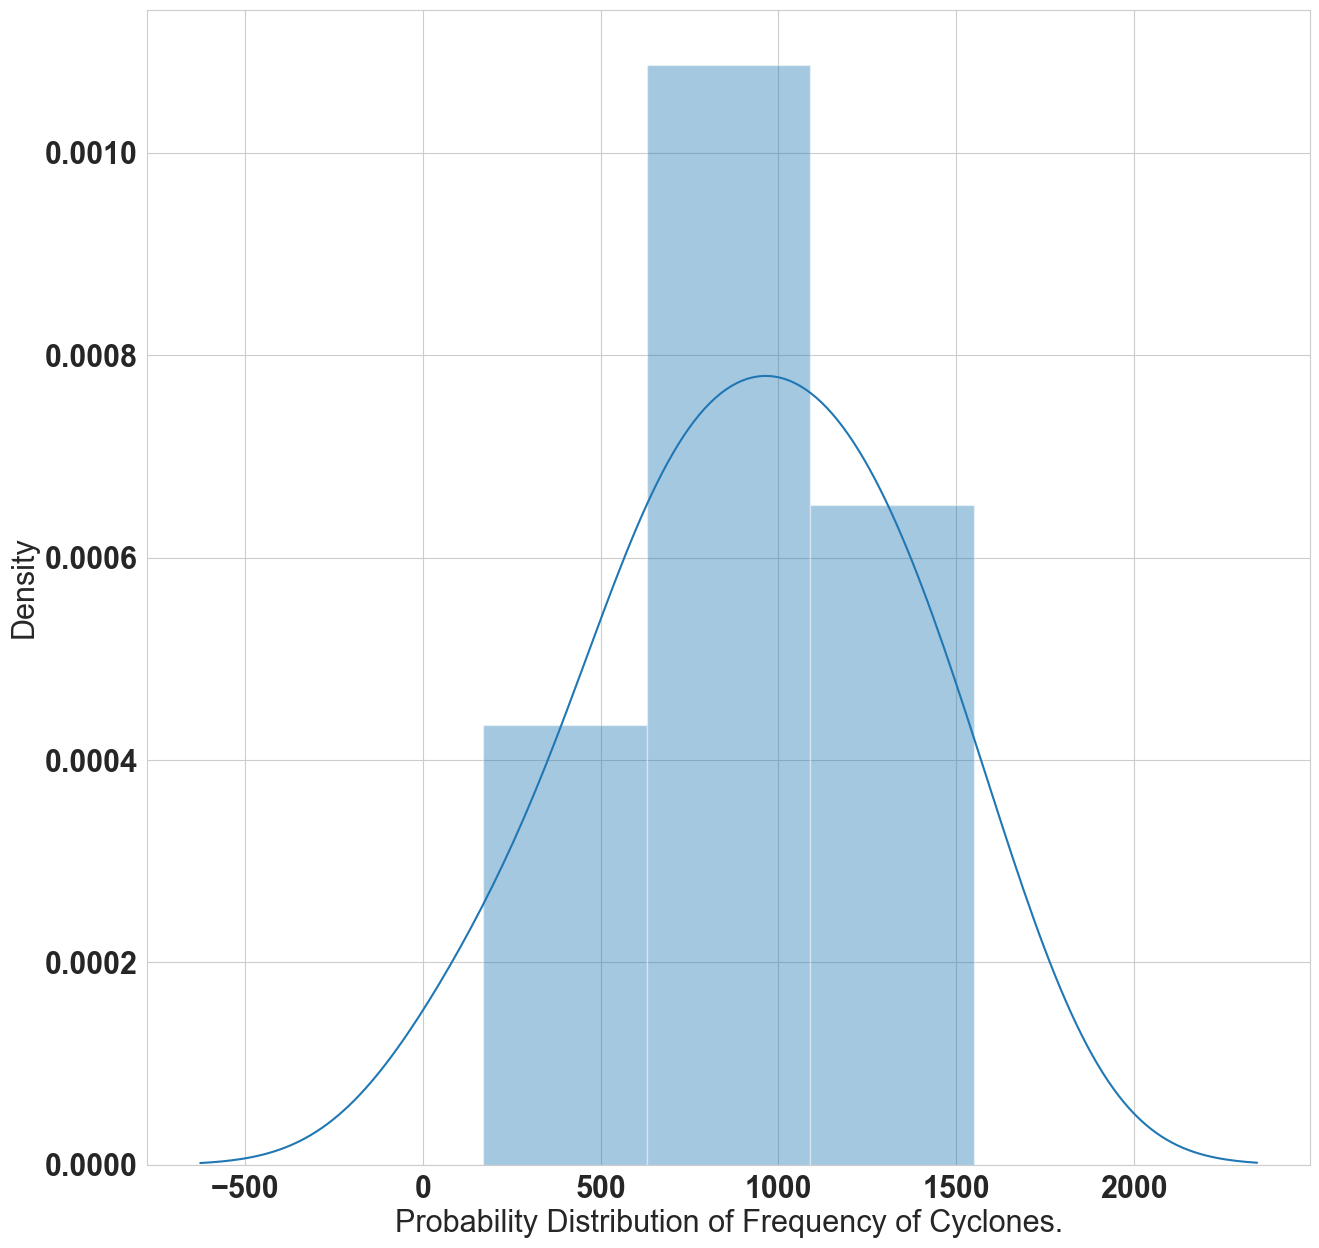

In [42]:

temp = merged_data.groupby('year').count().sort_values(by = 'Date' , ascending = False)
plt.figure(figsize=(15,15))
sns.distplot(temp['Date'].values , norm_hist = True , axlabel = 'Probability Distribution of Frequency of Cyclones.')

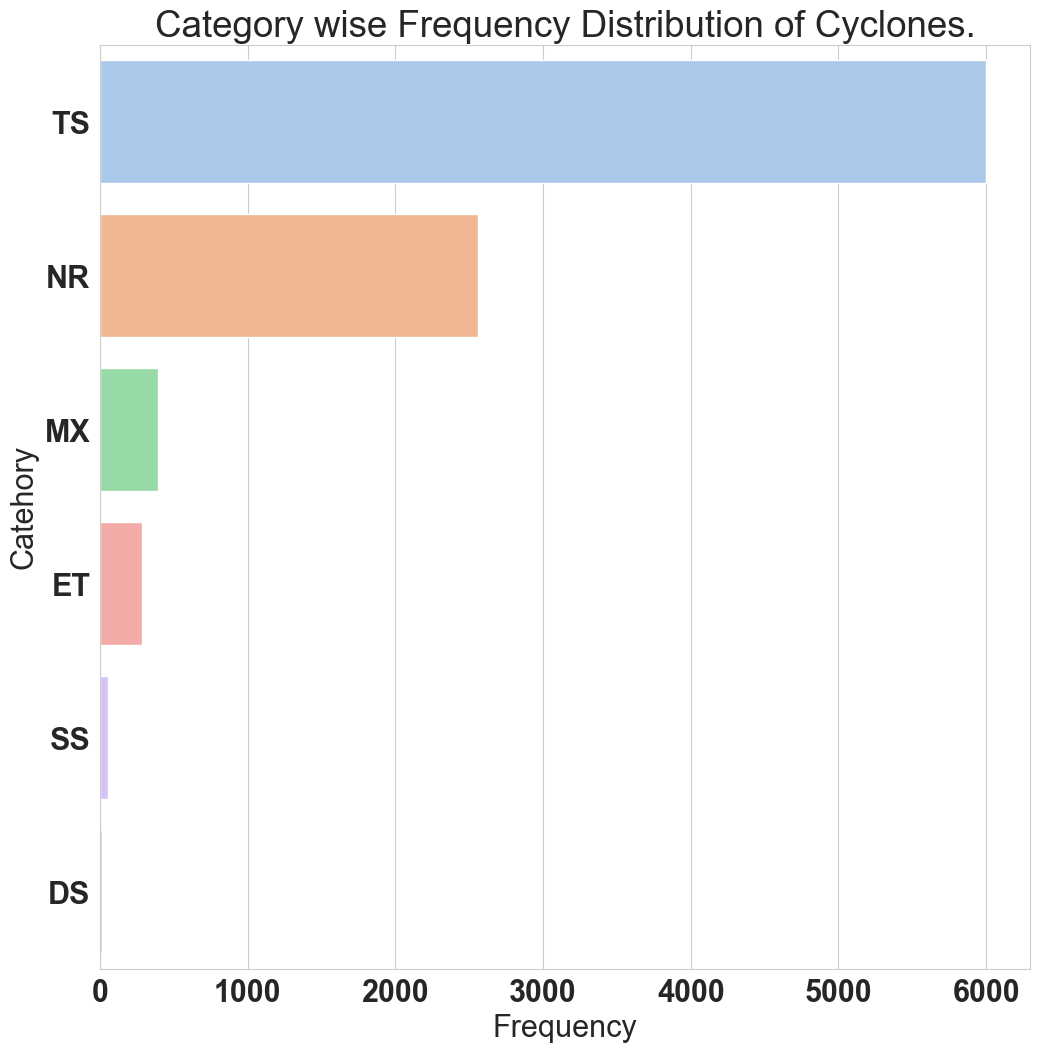

In [43]:
# Combined storm type.
# This is assigned based on all available storm types. They include:
# DS - Disturbance
# TS - Tropical
# ET - Extratropical
# SS - Subtropical
# NR - Not reported
# MX - Mixture (contradicting nature reports from different agencies)

temp = merged_data.groupby('NATURE').count().sort_values(by = 'year' , ascending = False)
fig , ax = plt.subplots()
fig.set_size_inches(12,12)
sns.barplot(y = list(temp.index) , x = 'year' , data = temp, palette= 'pastel' )
plt.xlabel('Frequency')
plt.ylabel('Catehory')
plt.title('Category wise Frequency Distribution of Cyclones.')
plt.show()

In [44]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
%matplotlib notebook

In [60]:
data = pd.DataFrame(merged_data, columns=['DIST2LAND','STORM_SPEED', 'NAME','year'])
data_sorted = data.groupby('NAME').count().sort_values(by='year', ascending=False)
data_sorted = data.sort_values(by='STORM_SPEED', ascending=False)
data_sorted['STORM_kmh'] = data_sorted['DIST2LAND'] / data_sorted['STORM_SPEED'] 
#data_sorted.head()
pd.options.display.float_format = '{:,.0f}'.format
data_sorted.set_index('NAME', inplace=True)
ranking = data_sorted.head(50)
ranking

,DIST2LAND,STORM_SPEED,year,STORM_kmh
NAME,,,,
GUAMBE,1575,59,2021,27
GUAMBE,1452,55,2021,26
IRVING,1024,53,2018,19
IRVING,1181,52,2018,23
BANSI,2610,49,2015,53
IRVING,1361,49,2018,28
GUAMBE,1261,47,2021,27
BANSI,2334,44,2015,53
IRVING,1535,43,2018,36


In [61]:
# Variables
index = ranking.index
values = ranking['STORM_SPEED']
plot_title = 'Top 50 Cyclones'
title_size = 18
subtitle = 'Tropical'
x_label = 'Distance to Land Speed Kmh'
filename = 'barh-plot'

In [51]:
ranking.sort_values(by='STORM_SPEED', inplace=True, ascending=True)

C:\Users\vsubramanian\AppData\Local\Temp\ipykernel_21100\2931796312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ranking.sort_values(by='STORM_SPEED', inplace=True, ascending=True)


<IPython.core.display.Javascript object>


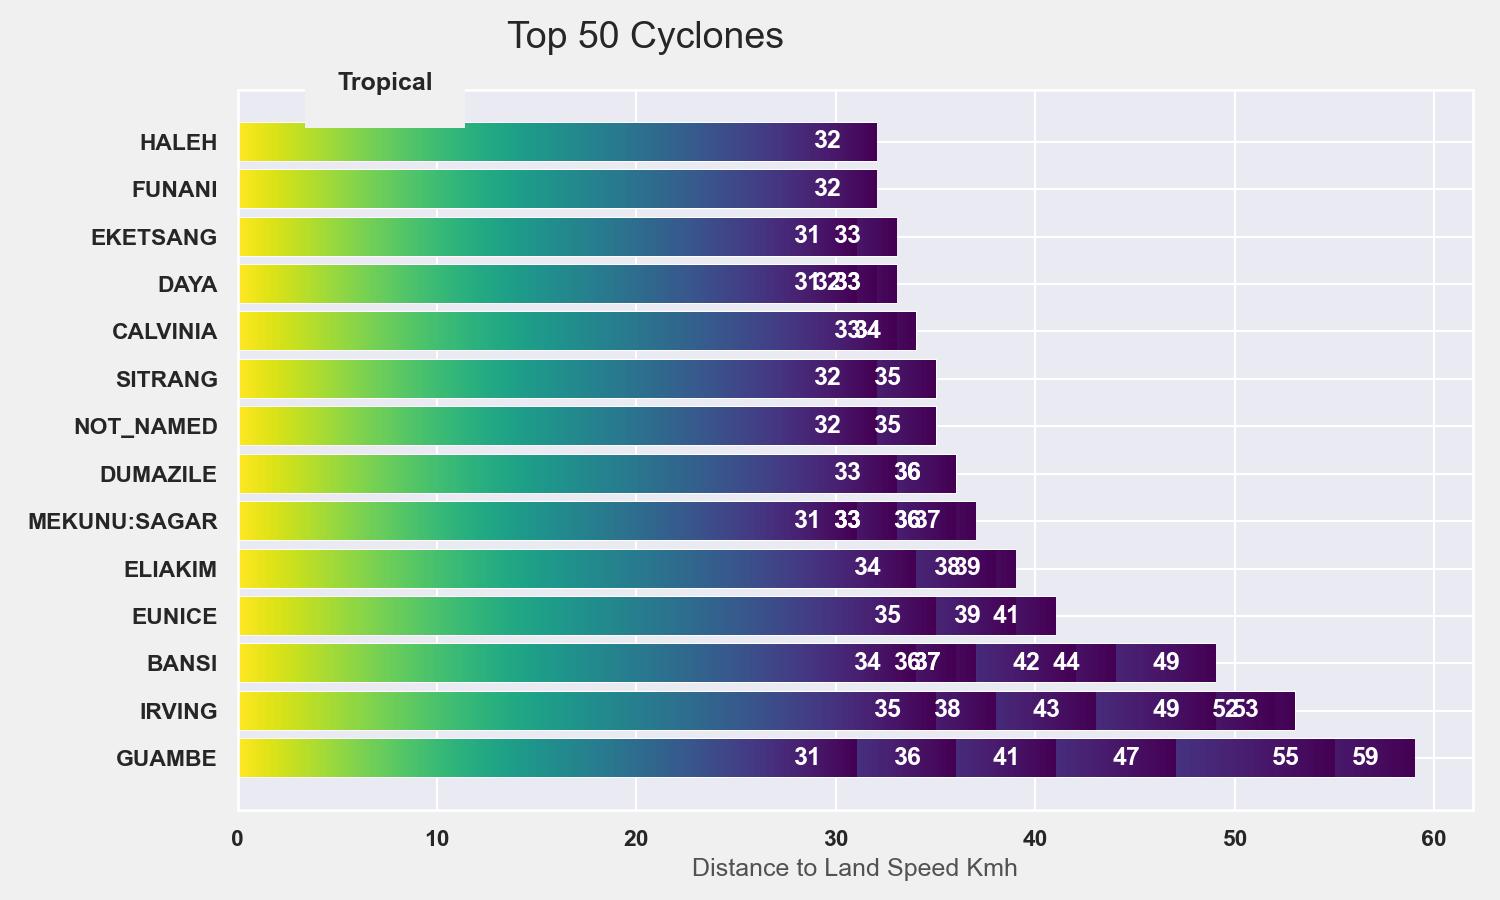

Text(0.5, 33.249999999999986, 'Distance to Land Speed Kmh')

In [62]:
fig, ax = plt.subplots(figsize=(10,6), facecolor=(.94, .94, .94))
mpl.pyplot.viridis()

bar = ax.barh(index, values)
plt.tight_layout()
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

title = plt.title(plot_title, pad=20, fontsize=title_size)
title.set_position([.33, 1])
plt.subplots_adjust(top=0.9, bottom=0.1)

ax.grid(zorder=0)

def gradientbars(bars):
    grad = np.atleast_2d(np.linspace(0,1,256))
    ax = bars[0].axes
    lim = ax.get_xlim()+ax.get_ylim()
    for bar in bars:
        bar.set_zorder(1)
        bar.set_facecolor('none')
        x,y = bar.get_xy()
        w, h = bar.get_width(), bar.get_height()
        ax.imshow(grad, extent=[x+w, x, y, y+h], aspect='auto', zorder=1)
    ax.axis(lim)
gradientbars(bar)

        
rects = ax.patches
# Place a label for each bar
for rect in rects:
    # Get X and Y placement of label from rect
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label; change to your liking
    space = -30
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: place label to the left of the bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label to the right
        ha = 'right'

    # Use X value as label and format number
    label = '{:,.0f}'.format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at bar end
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords='offset points', # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha,                      # Horizontally align label differently for positive and negative values
        color = 'white')            # Change label color to white
    
        
    # Set subtitle
    tfrom = ax.get_xaxis_transform()
    ann = ax.annotate(subtitle, xy=(5, 1), xycoords=tfrom, bbox=dict(boxstyle='square,pad=1.3', fc='#f0f0f0', ec='none'))

#Set x-label
ax.set_xlabel(x_label, color='#525252')
    